# Text2Representation

Synthesizing architecture imagery with CLIP-guided generative latent space search. Based on the implementation [here](https://github.com/galatolofederico/clip-glass), with a StyleGan2 trained on the [ArchML dataset](http://165.227.182.79/)


## Instructions

1) Click the play button of the blocks titled "Initialization" and wait for them to finish the setup

2) Select a model and a enter a phrase in the form titled "Text2Representation"

3) Click the play button of the block titled "Text2Representation" to generate 
drawings from the phrase 



In [1]:
%%capture
#@title Initialization - Setup
import subprocess
import re

nvcc = subprocess.check_output(["nvcc", "--version"]).decode("utf-8")
version = re.findall("release (\d+\.\d+)", nvcc)[0]

pytorch_suffix = {
    "10.0": "+cu100",
    "10.1": "+cu101",
    "10.2": "",
}

pytorch_version = "1.7.1" + (pytorch_suffix[version] if version in pytorch_suffix else "+cu110")
torchvision_version = "0.8.2" + (pytorch_suffix[version] if version in pytorch_suffix else "+cu110")
%rm -rf archlectures
!git clone https://github.com/armaank/archlectures.git
%cd archlectures/generative



In [2]:
#@title Initialization - Download Models
%%capture
%%sh
chmod 755 get_models.sh
./get_models.sh


In [3]:
#@title Initialization - Install Requirements
%%capture

# %cd archlectures/generative/stylclip/
%pwd

try:
  import torch
except:
  !pip install torch=={pytorch_version} -f https://download.pytorch.org/whl/torch_stable.html

try:
  import torchvision
except:
  !pip install torchvision=={torchvision_version} -f https://download.pytorch.org/whl/torch_stable.html

!pip install pytorch_pretrained_biggan pymoo kornia ftfy tensorboard

/content/archlectures/generative
/content/archlectures/generative/stylclip


100%|███████████████████████| 353976522/353976522 [00:09<00:00, 37717180.61it/s]
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      16 |  0.00000E+00 |  0.00000E+00 |       2 |            - |            -
    2 |      32 |  0.00000E+00 |  0.00000E+00 |       2 |   0.47706422 |        ideal
    3 |      48 |  0.00000E+00 |  0.00000E+00 |       3 |  0.028301887 |        nadir
    4 |      64 |  0.00000E+00 |  0.00000E+00 |       4 |  0.135061279 |            f
    5 |      80 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
    6 |      96 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
    7 |     112 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
    8 |     128 |  0.00000E+00 |  0.00000E+00 |       3 |     0.962963 |        nadir
    9 |     144 |  0.00000E+00 |  0.00000E+00 |       3 |      0.15625 |        ideal
   10 |     160 |  0.00000E+00 |  0.00000E+00 |       4 |    0.6937799 |        ideal


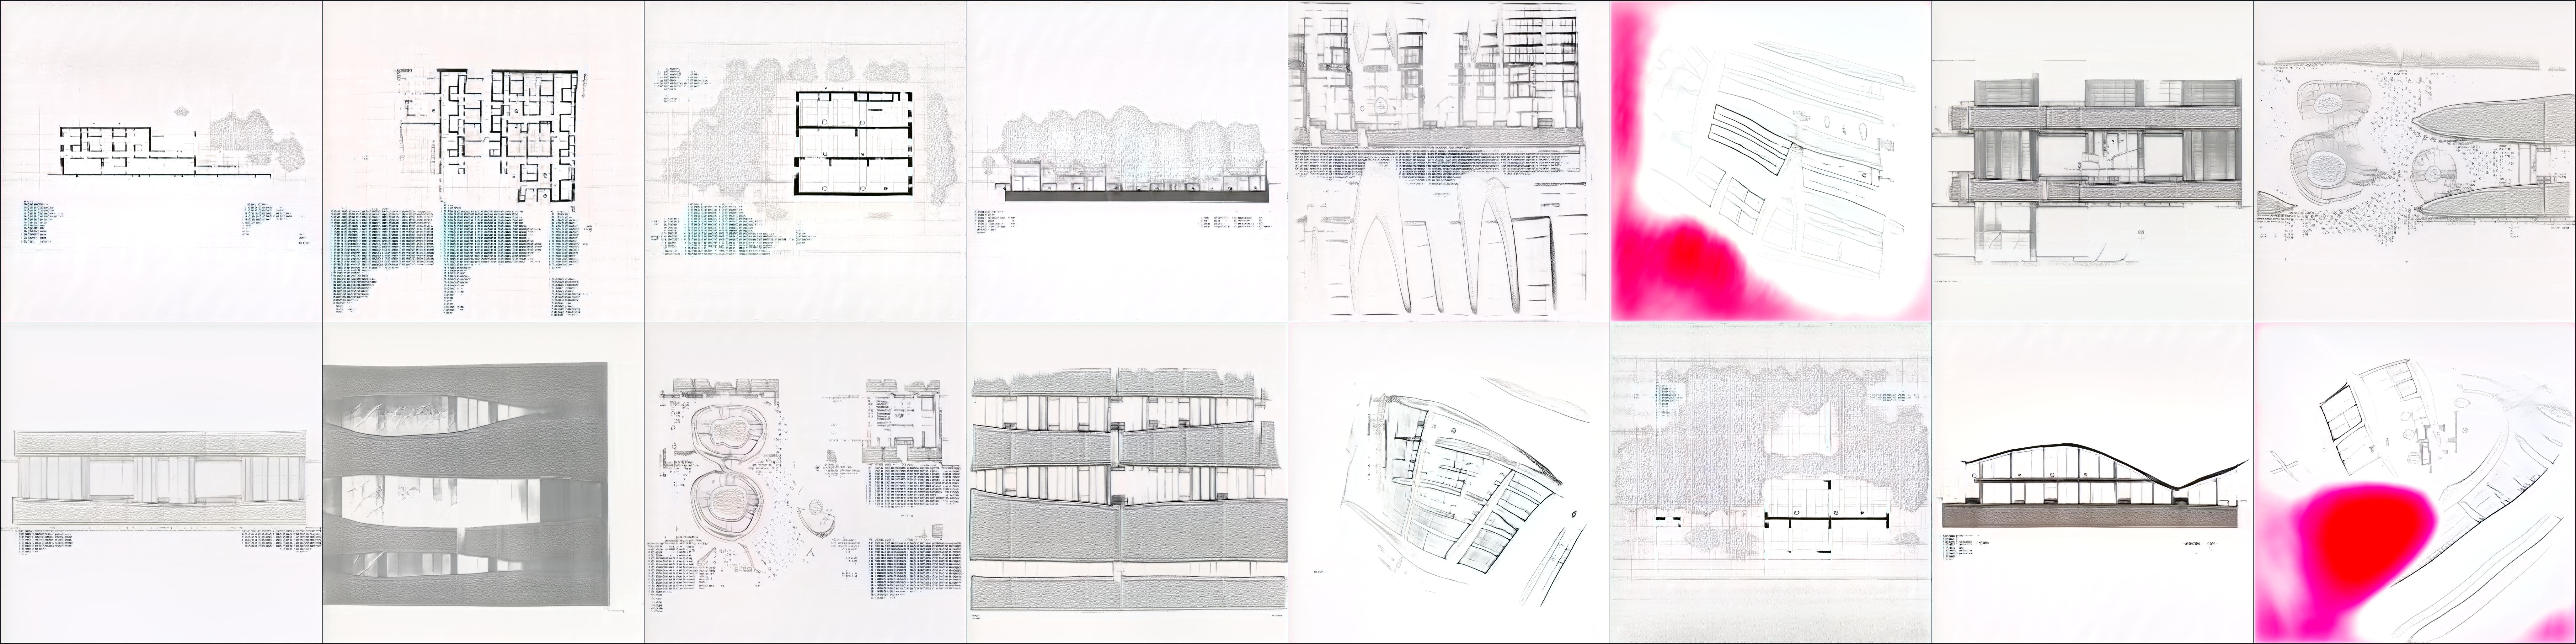

   11 |     176 |  0.00000E+00 |  0.00000E+00 |       5 |  0.011657565 |            f
   12 |     192 |  0.00000E+00 |  0.00000E+00 |       5 |  0.00000E+00 |            f
   13 |     208 |  0.00000E+00 |  0.00000E+00 |       5 |  0.00000E+00 |            f
   14 |     224 |  0.00000E+00 |  0.00000E+00 |       5 |  0.00000E+00 |            f
   15 |     240 |  0.00000E+00 |  0.00000E+00 |       5 |  0.00000E+00 |            f
   16 |     256 |  0.00000E+00 |  0.00000E+00 |       7 |  0.084521584 |            f
   17 |     272 |  0.00000E+00 |  0.00000E+00 |       5 |   0.33974358 |        nadir
   18 |     288 |  0.00000E+00 |  0.00000E+00 |       4 |  0.035367915 |            f
   19 |     304 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   20 |     320 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f


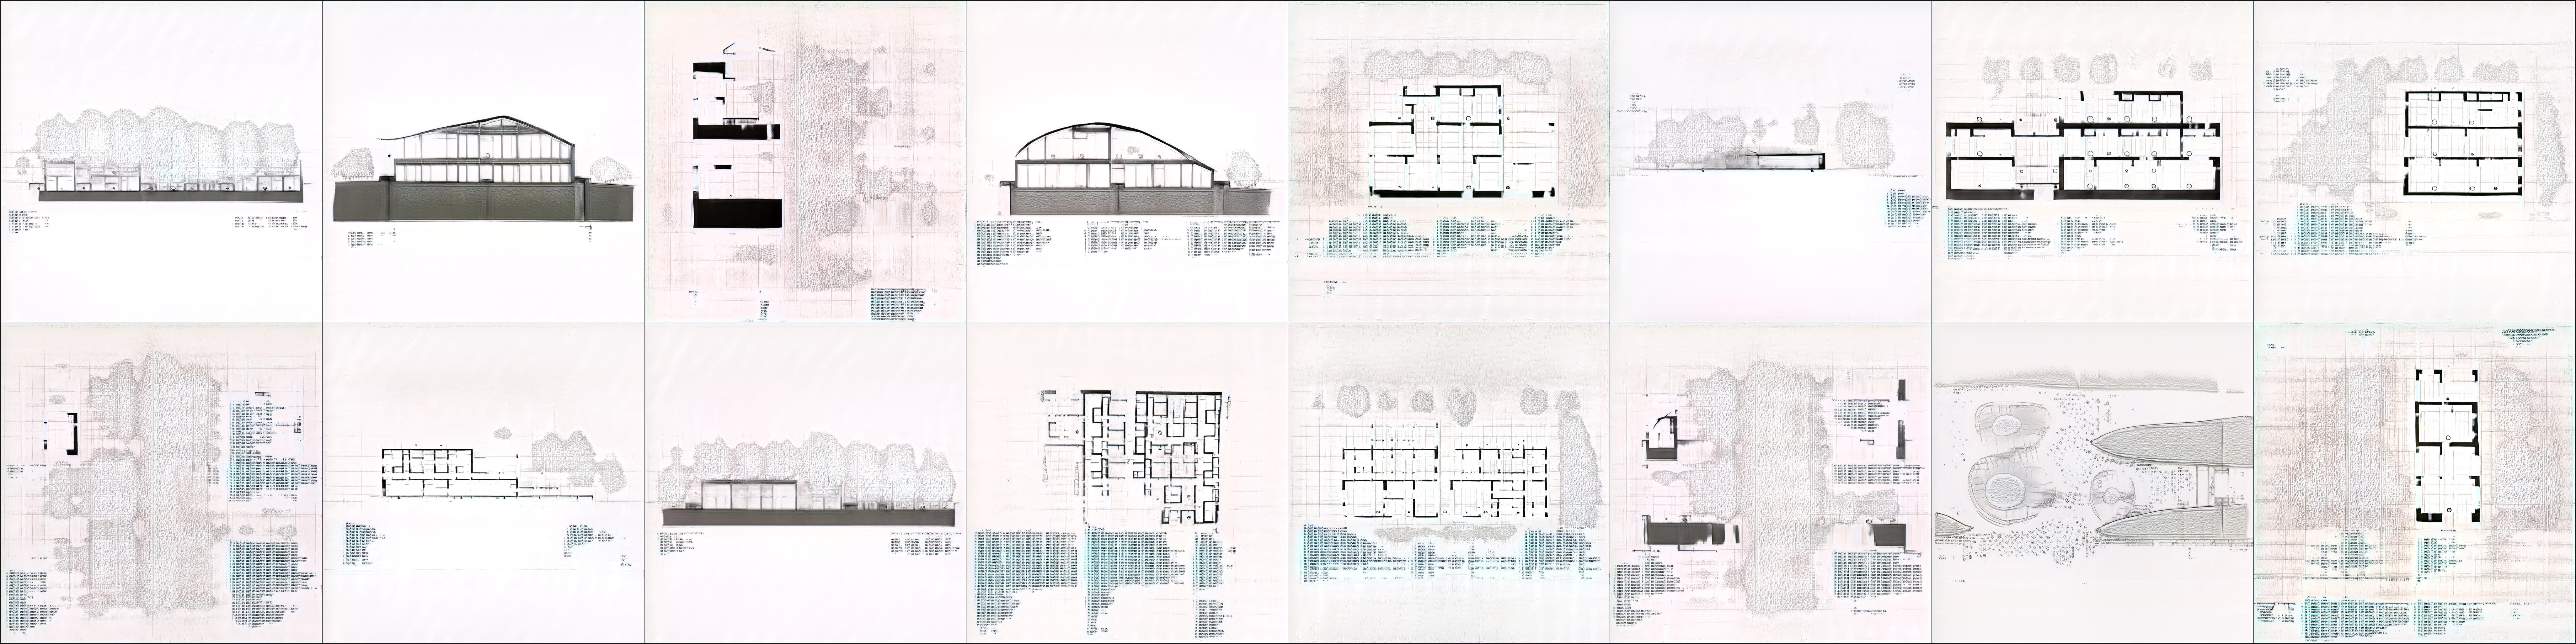

   21 |     336 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   22 |     352 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   23 |     368 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   24 |     384 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   25 |     400 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
   26 |     416 |  0.00000E+00 |  0.00000E+00 |       3 |  0.098265894 |        ideal
   27 |     432 |  0.00000E+00 |  0.00000E+00 |       2 |    1.1358025 |        nadir
   28 |     448 |  0.00000E+00 |  0.00000E+00 |       1 |    0.5434704 |        nadir
   29 |     464 |  0.00000E+00 |  0.00000E+00 |       1 |  0.00000E+00 |            f
   30 |     480 |  0.00000E+00 |  0.00000E+00 |       1 |  0.00000E+00 |            f


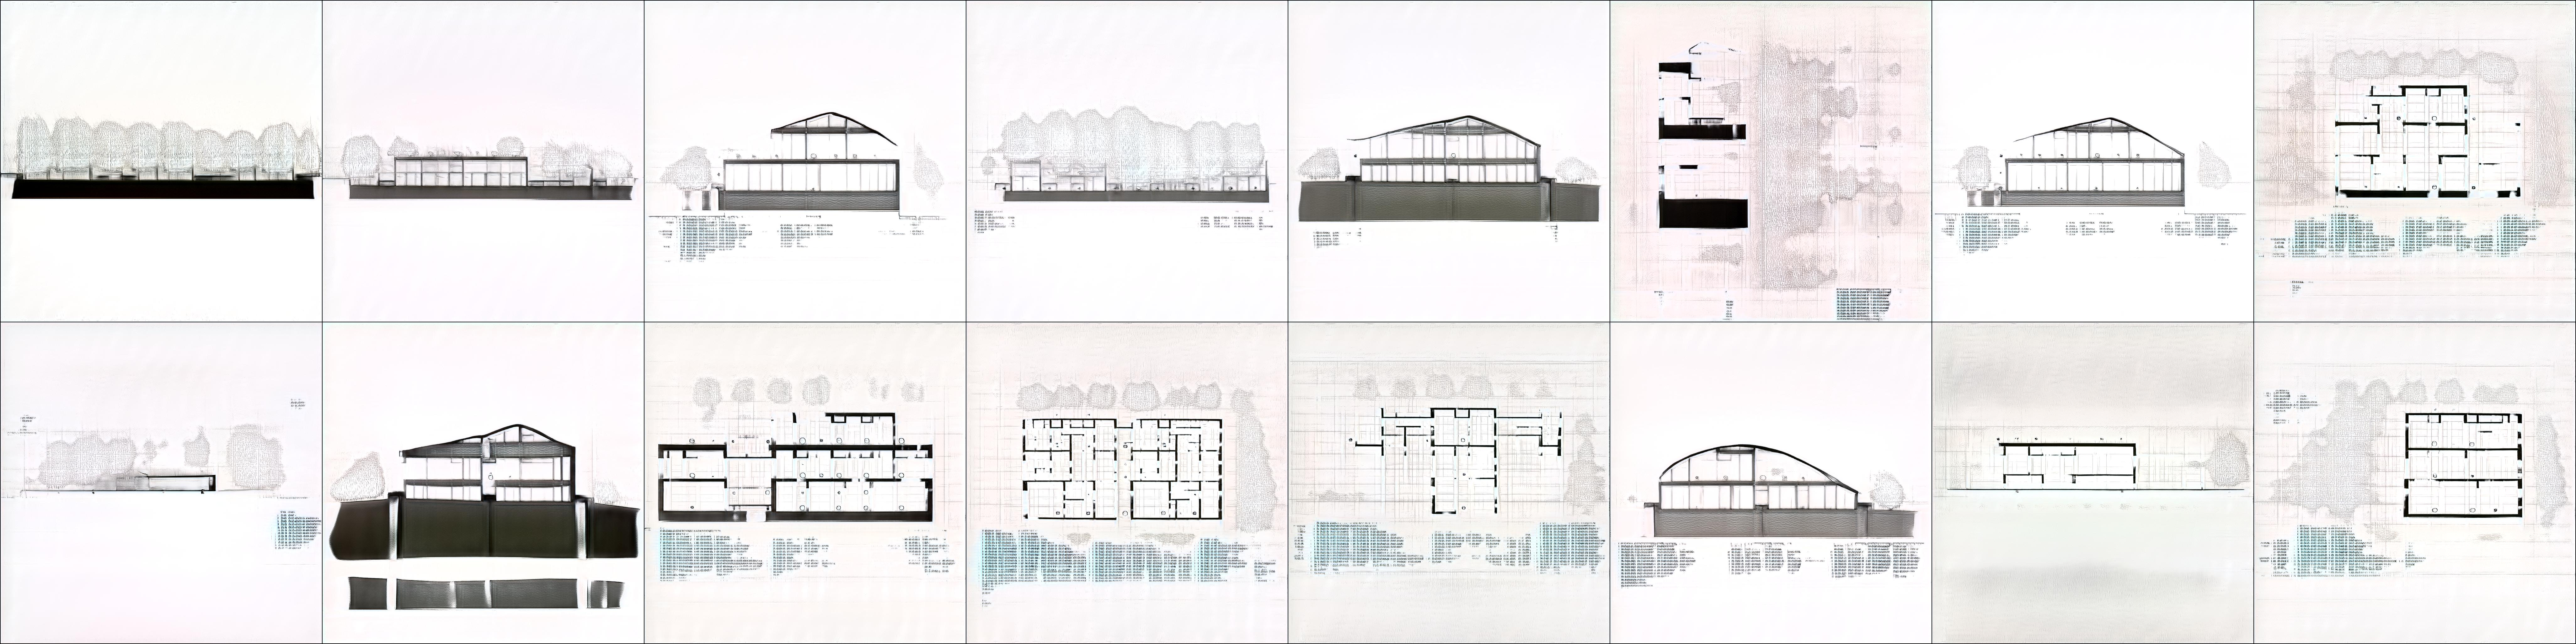

   31 |     496 |  0.00000E+00 |  0.00000E+00 |       1 |  0.00000E+00 |            f


KeyboardInterrupt: ignored

In [4]:
#@title Text2Representation
import argparse
import os
import torch
import numpy as np
import pickle
from pymoo.optimize import minimize
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_algorithm, get_decision_making, get_decomposition
from pymoo.visualization.scatter import Scatter
import torchvision
from IPython.display import Image, display
import urllib.request

%cd stylclip/
from config import get_config
from problem import GenerationProblem
from operators import get_operators

phrase = "big school for botanical sciences " #@param {type:"string"}
model = "Adaily_B" #@param ["Adaily_A", "Adaily_B"]
save_each =  10#@param {type:"number"}
generations = 100 #@param {type:"number"}

target = phrase
config = model
# if config == "GPT2":
#   try:
#     urllib.request.urlretrieve(target, "./target")
#     target = "./target"
#   except Exception as e:
#     print(e)
#     raise Exception("Target must be a vaild URL when using GPT2")
    
# if config=="Adaily":
#   ! ./download-weights.sh Adaily

# if "ffhq" in config:
#   ! ./download-weights.sh StyleGAN2-ffhq
# if "church" in config:
#   ! ./download-weights.sh StyleGAN2-church
# if "car" in config:
#   ! ./download-weights.sh StyleGAN2-car
# if config == "GPT2":
#   ! ./download-weights.sh GPT2

config = argparse.Namespace(
    config=config,
    target=target,
    device="cuda",
    generations=generations,
    save_each=save_each,
    tmp_folder="./tmp"
)

vars(config).update(get_config(config.config))


iteration = 0
def save_callback(algorithm):
    global iteration
    global config

    iteration += 1
    if iteration % config.save_each == 0 or iteration == config.generations:
        if config.problem_args["n_obj"] == 1:
            sortedpop = sorted(algorithm.pop, key=lambda p: p.F)
            X = np.stack([p.X for p in sortedpop])  
        else:
            X = algorithm.pop.get("X")
        
        ls = config.latent(config)
        ls.set_from_population(X)

        with torch.no_grad():
            generated = algorithm.problem.generator.generate(ls, minibatch=config.batch_size)
            name = "genetic-it-%d.jpg" % (iteration) if iteration < config.generations else "genetic-it-final.jpg"

            if config.task == "txt2img":
                algorithm.problem.generator.save(generated, os.path.join(config.tmp_folder, name))
                display(Image(os.path.join(config.tmp_folder, name)))
            elif config.task == "img2txt":
                print("\n".join(generated))
        

problem = GenerationProblem(config)
operators = get_operators(config)

if not os.path.exists(config.tmp_folder): os.mkdir(config.tmp_folder)

algorithm = get_algorithm(
    config.algorithm,
    pop_size=config.pop_size,
    sampling=operators["sampling"],
    crossover=operators["crossover"],
    mutation=operators["mutation"],
    eliminate_duplicates=True,
    callback=save_callback,
    **(config.algorithm_args[config.algorithm] if "algorithm_args" in config and config.algorithm in config.algorithm_args else dict())
)

res = minimize(
    problem,
    algorithm,
    ("n_gen", config.generations),
    save_history=False,
    verbose=True,
)


pickle.dump(dict(
    X = res.X,
    F = res.F,
    G = res.G,
    CV = res.CV,
), open(os.path.join(config.tmp_folder, "genetic_result"), "wb"))


if config.problem_args["n_obj"] == 1:
    X = np.atleast_2d(res.X)
else:
    try:
        result = get_decision_making("pseudo-weights", [0, 1]).do(res.F)
    except:
        print("Warning: cant use pseudo-weights")
        result = get_decomposition("asf").do(res.F, [0, 1]).argmin()
    X = res.X[result]
    X = np.atleast_2d(X)

print("="*50)
print("RESULT")
print("="*50)


ls = config.latent(config)
ls.set_from_population(X)

with torch.no_grad():
    generated = problem.generator.generate(ls)

if config.task == "txt2img":
    problem.generator.save(generated, os.path.join(config.tmp_folder, "output.jpg"))
    display(Image(os.path.join(config.tmp_folder, "output.jpg")))
elif config.task == "img2txt":
    print(generated)
